In [5]:
# # Download the train set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# # Download the test set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
    
# import zipfile

# # Extract the archive
# local_zip = 'rps.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('rps-train')
# zip_ref.close()

# local_zip = 'rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('rps-test')
# zip_ref.close()

#### Assign directory names

In [6]:
import os

base_dir = 'rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-047.png', 'rock04-019.png', 'rock03-050.png', 'rock04-020.png', 'rock07-k03-098.png', 'rock06ck02-092.png', 'rock04-001.png', 'rock01-117.png', 'rock04-105.png', 'rock02-115.png']
['paper07-110.png', 'paper03-023.png', 'paper04-110.png', 'paper06-014.png', 'paper03-105.png', 'paper03-104.png', 'paper05-007.png', 'paper03-050.png', 'paper07-080.png', 'paper04-049.png']
['scissors01-027.png', 'testscissors02-038.png', 'testscissors03-089.png', 'scissors03-106.png', 'testscissors03-014.png', 'scissors04-119.png', 'testscissors01-055.png', 'testscissors03-079.png', 'testscissors02-018.png', 'scissors04-060.png']


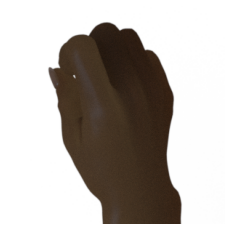

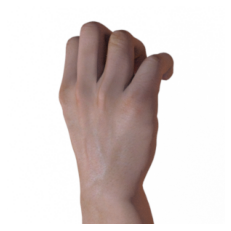

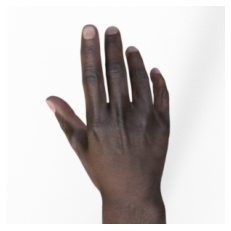

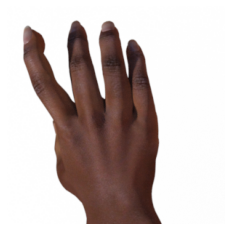

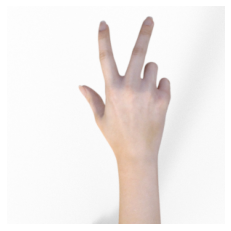

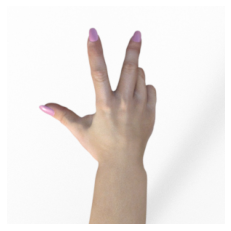

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

#### Build the model
output layer would be a 3-neron dense layer with Softmax activation.

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2022-09-04 14:03:34.393242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 14:03:34.397941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 14:03:34.398346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 14:03:34.399146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Change binary_crossentropy to categorical_crossentropy

In [10]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#### ImageDataGenerator

In [11]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


#### Train the model

In [12]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25


2022-09-04 14:06:42.698934: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-09-04 14:06:43.132857: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-04 14:06:44.003764: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


20/20 [==============================] - 13s 530ms/step - loss: 1.3701 - accuracy: 0.3286 - val_loss: 1.0914 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 10s 523ms/step - loss: 1.0740 - accuracy: 0.3940 - val_loss: 1.0427 - val_accuracy: 0.5753
Epoch 3/25
20/20 [==============================] - 10s 515ms/step - loss: 1.1583 - accuracy: 0.4619 - val_loss: 0.8685 - val_accuracy: 0.5618
Epoch 4/25
20/20 [==============================] - 10s 501ms/step - loss: 0.8762 - accuracy: 0.5865 - val_loss: 0.5751 - val_accuracy: 0.6613
Epoch 5/25
20/20 [==============================] - 10s 502ms/step - loss: 0.7177 - accuracy: 0.6504 - val_loss: 0.4170 - val_accuracy: 0.9543
Epoch 6/25
20/20 [==============================] - 10s 507ms/step - loss: 0.6790 - accuracy: 0.7060 - val_loss: 0.5300 - val_accuracy: 0.9113
Epoch 7/25
20/20 [==============================] - 10s 505ms/step - loss: 0.5166 - accuracy: 0.7802 - val_loss: 0.2184 - val_accuracy: 0.9462
Epoch 8/25

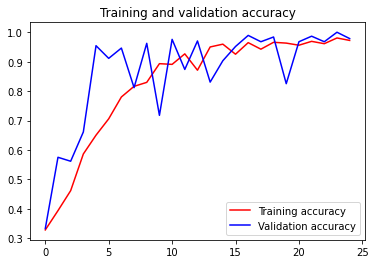

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()